# Synchronization between threads

Thread synchronization is defined as a mechanism which ensures that two or more concurrent threads do not simultaneously execute some particular program segment known as critical section.
* For example, in the diagram below, 3 threads try to access shared resource or critical section at the same time.

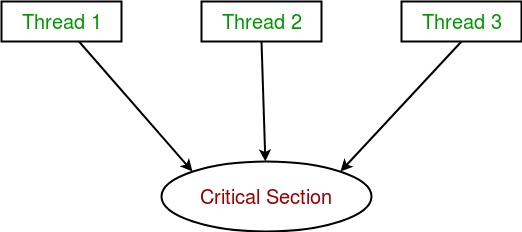

In [13]:
#Consider the program below to understand the concept of race condition:
import threading 

# global variable x 
x = 0

def increment(): 
	""" 
	function to increment global variable x 
	"""
	global x 
	x += 1

def thread_task(): 
	""" 
	task for thread 
	calls increment function 100000 times. 
	"""
	for _ in range(100000): 
		increment()

def main_task(): 
	global x 
	# setting global variable x as 0 
	x = 0

	# creating threads 
	t1 = threading.Thread(target=thread_task) 
	t2 = threading.Thread(target=thread_task) 

	# start threads 
	t1.start() 
	t2.start() 

	# wait until threads finish their job 
	t1.join() 
	t2.join() 

if __name__ == "__main__": 
	for i in range(10): 
		main_task() 
		print("Iteration {0}: x = {1}".format(i,x)) 


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


# race condition
* A race condition occurs when two or more threads can access shared data and they try to change it at the same time. As a result, the values of variables may be unpredictable and vary depending on the timings of context switches of the processes.

```Hence, we need a tool for proper synchronization between multiple threads.
```
# Using Locks

Lock class provides following methods:

- acquire([blocking]) : To acquire a lock. A lock can be blocking or non-blocking.
    - When invoked with the blocking argument set to True (the default), thread execution is blocked until the lock is unlocked, then lock is set to locked and return True.
    - When invoked with the blocking argument set to False, thread execution is not blocked. If lock is unlocked, then set it to locked and return True else return False immediately.
- release() : To release a lock.
    - When the lock is locked, reset it to unlocked, and return. If any other threads are blocked waiting for the lock to become unlocked, allow exactly one of them to proceed.
    - If lock is already unlocked, a ThreadError is raised.

In [1]:
import threading 

# global variable x 
x = 0

def increment(): 
	""" 
	function to increment global variable x 
	"""
	global x 
	x += 1

def thread_task(lock): 
	""" 
	task for thread 
	calls increment function 100000 times. 
	"""
	for _ in range(100000): 
		with lock:
			increment()

def main_task(): 
	global x 
	# setting global variable x as 0 
	x = 0

	# creating a lock 
	lock = threading.Lock() 

	# creating threads 
	t1 = threading.Thread(target=thread_task, args=(lock,)) 
	t2 = threading.Thread(target=thread_task, args=(lock,)) 

	# start threads 
	t1.start() 
	t2.start() 

	# wait until threads finish their job 
	t1.join() 
	t2.join() 

if __name__ == "__main__": 
	for i in range(10): 
		main_task() 
		print("Iteration {0}: x = {1}".format(i,x)) 


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


In [1]:
import threading

# Shared data
shared_counter = 0
lock = threading.Lock()

# Function to be executed by threads
def increment_counter():
    global shared_counter
    for _ in range(1000000):
        # Acquire the lock before accessing the shared counter
        with lock:
            shared_counter += 1
        # Release the lock after updating the shared counter

# Create two threads
thread1 = threading.Thread(target=increment_counter)
thread2 = threading.Thread(target=increment_counter)

# Start the threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("Shared Counter:", shared_counter)


Shared Counter: 2000000
